In [1]:
'''
File name : Data_handling.ipynb
Author : Group MrJulia
Date created : '18/11/2022'
Python version : 3.6
'''
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import cpi

cmu_folder = './Data/Cmu_data/'
scraping_folder='./Data/Scraping/'
queries_folder='./Data/Queries/'
imdb_folder= './Data/Imdb_data/'

# Data wrangling:

### 1. loading data :

In [2]:
colnames=["Wikipedia movie ID","Freebase movie ID","Movie name","Movie release date","Movie box office revenue","Movie runtime","Movie languages","Movie countries","Movie genres"]
df_movies=pd.read_csv(cmu_folder+'/movie.metadata.tsv', sep="\t", names = colnames)
df_movies.head(5)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


### 2. General overview and informations about Movie dataset :

In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wikipedia movie ID        81741 non-null  int64  
 1   Freebase movie ID         81741 non-null  object 
 2   Movie name                81741 non-null  object 
 3   Movie release date        74839 non-null  object 
 4   Movie box office revenue  8401 non-null   float64
 5   Movie runtime             61291 non-null  float64
 6   Movie languages           81741 non-null  object 
 7   Movie countries           81741 non-null  object 
 8   Movie genres              81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


**we notice that :**

* the size of our dataset is 81741 movies 
* we are missing a lot of values in the Movie Box office Revenue feature : (73 340 null values)
* we are missing some values in the Movie runtime feature : (20 450 null values)
* we are missing some values in the Movie release date feature : (6908 null values)

In [4]:
df_movies.describe()

,Wikipedia movie ID,Movie box office revenue,Movie runtime
count,8.174100e+04,8.401000e+03,6.129100e+04
mean,1.740784e+07,4.799363e+07,1.118192e+02
std,1.098791e+07,1.121753e+08,4.360070e+03
min,3.300000e+02,1.000000e+04,0.000000e+00
25%,7.323695e+06,2.083193e+06,8.100000e+01
50%,1.777899e+07,1.063969e+07,9.300000e+01
75%,2.715573e+07,4.071696e+07,1.060000e+02
max,3.750192e+07,2.782275e+09,1.079281e+06


**using the describtion of the dataset** :

* we observe that amongst the MBO (the Movie Box office ) revenues that we have : 
* the mean revenue is approximetely 48 Million dollars.
* From the quantile analysis of these revenues, we see that:
    * 1. 25% of the movies have generated less than approximetly 2Million dollars.
    * 2. 50% of these movies have generated less than approximetly 10Million dollars, and 50% have generated more.
    * 3. only 25% of these movies have generated more than 40Million dollars

In [5]:
max_revenue = df_movies['Movie box office revenue'].max()
df_movies[df_movies['Movie box office revenue'] == max_revenue]

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
23702,4273140,/m/0bth54,Avatar,2009-12-10,2.782275e+09,178.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."


***We see that the movie with the most revenue generated is : Avatar released in 2009 with an approximate revenue of 278Million dollars***

In [6]:
min_revenue = df_movies['Movie box office revenue'].min()
df_movies[df_movies['Movie box office revenue'] == min_revenue]

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
35178,28223867,/m/07l4_10,"Hugh Hefner: Playboy, Activist and Rebel",2010-07-30,10000.0,135.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0d060g"": ""Canada""}","{""/m/0hj3n07"": ""Culture & Society"", ""/m/017fp""..."


***Whereas the movie with the least revenue generated is : Hugh Hefner released in 2010 with an approximate revenue of 10 thousand dollars***

### 3. data cleaning :

In [7]:
df_movies['Movie languages']

0        {"/m/02h40lc": "English Language"}
1        {"/m/02h40lc": "English Language"}
2        {"/m/05f_3": "Norwegian Language"}
3        {"/m/02h40lc": "English Language"}
4         {"/m/04306rv": "German Language"}
                        ...                
81736    {"/m/02h40lc": "English Language"}
81737    {"/m/02h40lc": "English Language"}
81738    {"/m/02h40lc": "English Language"}
81739     {"/m/03_9r": "Japanese Language"}
81740    {"/m/02h40lc": "English Language"}
Name: Movie languages, Length: 81741, dtype: object

***
* Upon looking at the first 5 elements of the dataset, we notice that in the "Movie languages", "Movie countries" and "Movie genres" fields : the values are dictionnaries with the freebase identifier of the value as a key
*** 

In [8]:
#example
df_movies.iloc[0]['Movie genres']

'{"/m/01jfsb": "Thriller", "/m/06n90": "Science Fiction", "/m/03npn": "Horror", "/m/03k9fj": "Adventure", "/m/0fdjb": "Supernatural", "/m/02kdv5l": "Action", "/m/09zvmj": "Space western"}'

***
Since we will not be using the identifier key of these dictionnaries, we are only interested by the values namely for this exmaple: the genres -> "Thriller", "Science Fiction", "Horror", "Adventure", "Supernatural", "Action", "Space western"
* Thus we decided to represent each entry of these fields as a list of string values for the genres, the Movie countries and The movie languages.
*** 

In [9]:
def list_process_dict(x) :
    '''
    Extracts the values from a dictionary string
    param: x : dictionary string to be processed
    returns : a list of the dictionary values
    '''
    #split keys and values
    b = x.split(':')
    #extract strings
    b = sum([xb.split('"') for xb in b],[])
    #reduce white spaces of any length to empty strings
    b = [xb.strip() for xb in b]
    #remove empty strings, only the values start with alphanumeric characters
    b = [xb for xb in b if(xb!='' and xb[0].isalnum())]
    return b

In [10]:
#we process our dictionnaries to get lists
df_movies['Movie genres']=df_movies['Movie genres'].apply(lambda x : list_process_dict(x))
df_movies['Movie languages']=df_movies['Movie languages'].apply(lambda x : list_process_dict(x))
df_movies['Movie countries']=df_movies['Movie countries'].apply(lambda x : list_process_dict(x))
df_movies.head(5)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]


In [11]:
df_movies[['Movie name', 'Movie countries', 'Movie languages', 'Movie genres']].tail(10)

,Movie name,Movie countries,Movie languages,Movie genres
81731,La Ragazza di Trieste,[Italy],[Italian Language],"[Romance Film, Drama]"
81732,Eşrefpaşalılar,[],[],"[Comedy film, Drama]"
81733,The Ghost Train,[United Kingdom],[English Language],"[Crime Fiction, Thriller, Comedy, Supernatural]"
81734,My Love,[Russia],[Russian Language],[Short Film]
81735,Shadow Boxing 2,[Russia],"[Russian Language, English Language]","[Sports, Crime Fiction, Action, Drama]"
81736,Mermaids: The Body Found,[United States of America],[English Language],[Drama]
81737,Knuckle,"[Ireland, United Kingdom]",[English Language],"[Biographical film, Drama, Documentary]"
81738,Another Nice Mess,[United States of America],[English Language],"[Satire, Comedy]"
81739,The Super Dimension Fortress Macross II: Lover...,[Japan],[Japanese Language],"[Science Fiction, Japanese Movies, Adventure, ..."
81740,Spliced,[Canada],[English Language],"[Thriller, Horror, Slasher, Teen]"


***
Furthermore, after doing this previous preprocessing, we discover that some movies have empty lists in the fields : 'Movie countries', 'Movie languages', 'Movie genres'
***

***so we proceed by replacing all the empty lists and empty titles ( if there is any ) by nan values***

In [12]:
#we change all the empty lists and empty name fields with nan values
df_movies['Movie countries'] = df_movies['Movie countries'].apply(lambda x : np.nan if(not x) else x)
df_movies['Movie languages'] = df_movies['Movie languages'].apply(lambda x : np.nan if(not x) else x)
df_movies['Movie genres'] = df_movies['Movie genres'].apply(lambda x : np.nan if(not x) else x)
df_movies['Movie name'] = df_movies['Movie name'].apply(lambda x : np.nan if(not x) else x)

In [13]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wikipedia movie ID        81741 non-null  int64  
 1   Freebase movie ID         81741 non-null  object 
 2   Movie name                81741 non-null  object 
 3   Movie release date        74839 non-null  object 
 4   Movie box office revenue  8401 non-null   float64
 5   Movie runtime             61291 non-null  float64
 6   Movie languages           67875 non-null  object 
 7   Movie countries           73587 non-null  object 
 8   Movie genres              79447 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


**we notice that in addition to the previous infos we analysed:**
* we are indeed missing some values in the Movie languages : (13 866 null values)
* we are missing some values in the Movie countries : (8153 null values)
* we are missing some values in the Movie genres : (2294 null values)

## for now we drop all na values :

In [14]:
df_movies = df_movies.dropna()

#we add a column called year released to make it easier to visualize 
#the distribution of the number movies released over the years 
#to do so :we split our string field date using the '-' seperator
years = df_movies['Movie release date'].copy().astype('str').apply(lambda x : x.split('-')[0])
df_movies.insert(4, "Year released", years, True)


***
### In the following section, we will identify our constraints on the dataset :
* we start by exploding each one of the categorical fields we have (namely : genre, countries)

In [15]:
copie1 = df_movies.copy().explode('Movie countries')
copie2 = df_movies.copy().explode('Movie genres')

* Followed by an analysis of the value count within the Movie countries field :

In [16]:
count_countries = copie1['Movie countries'].value_counts()
count_gen = copie2['Movie genres'].value_counts()

In [17]:
print("We have " + str(len(count_countries)) +" different countries")
print("Here are the top 10 countries with the most movies in our dataset :")
count_countries[:10]

We have 88 different countries
Here are the top 10 countries with the most movies in our dataset :


United States of America    6779
United Kingdom               926
France                       492
Germany                      444
Canada                       325
South Korea                  239
Japan                        197
Australia                    165
Italy                        149
Spain                         95
Name: Movie countries, dtype: int64

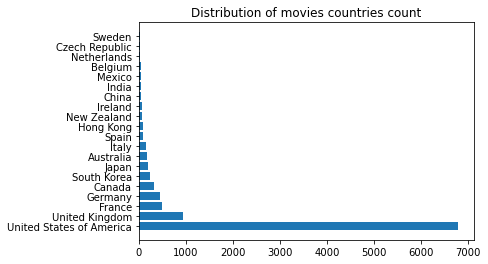

In [18]:
#horizontal bar plot of count_countries
plt.barh(count_countries.index[:20], count_countries[:20])
plt.title("Distribution of movies countries count")
plt.show()

### In light of these obtained results, we decided to constraint our data analysis to movies that were released in the U.S only. This will help us deal with the inflation effeciently by only considering US inflation over the years (more informations further down)

### 3. Constraining:

In [19]:
#Us constraint language 
exploded_countries = df_movies.copy().explode('Movie countries')
only_us_movies = exploded_countries[exploded_countries['Movie countries'] == 'United States of America']
only_us_movies.head(3)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Year released,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,2001,14010832.0,98.0,[English Language],United States of America,"[Thriller, Science Fiction, Horror, Adventure,..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,1938,3600000.0,106.0,[English Language],United States of America,"[Musical, Comedy, Black-and-white]"
17,77856,/m/0kcn7,Mary Poppins,1964-08-27,1964,102272727.0,139.0,[English Language],United States of America,"[Children's/Family, Musical, Fantasy, Comedy, ..."


In [20]:
#next, we look at the distribution of our languages after our constrain
df_movies = only_us_movies.copy()
copie3 = df_movies.copy().explode('Movie languages')
count_lang = copie3['Movie languages'].value_counts()
print("We have " + str(len(count_lang)) +" different languages")
print("Here are the top 10 languages with the most movies in our dataset :")
count_lang[:10]

We have 118 different languages
Here are the top 10 languages with the most movies in our dataset :


English Language     6752
Spanish Language      351
French Language       324
German Language       191
Italian Language      176
Russian Language      140
Japanese Language     112
Standard Mandarin      61
Arabic Language        60
Latin Language         37
Name: Movie languages, dtype: int64

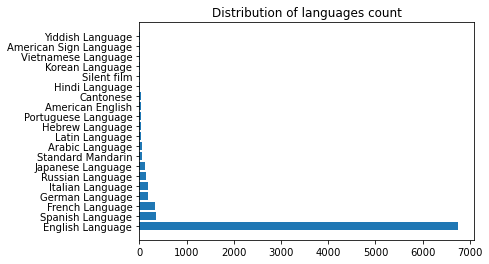

In [21]:
#horizontal bar plot of languages count
plt.barh(count_lang.index[:20], count_lang[:20])
plt.title("Distribution of languages count")
plt.show()

***
* Timeline constraint : We wanted to constraint our data analysis to the period from 1980 to 2010

In [22]:
#compute the percentage our movies that were released between the period 1980 to 2010 in our dataset
count_year = df_movies['Year released'].value_counts()
count_year.index=count_year.index.astype(int)
count_year= count_year.sort_index()
percentage = (np.sum(count_year.loc[1980:2010])/len(df_movies))*100
print("Percentage of movies released between 1980 and 2010 over the total number of movies in the dataset is :")
print(str(percentage) + " %")

Percentage of movies released between 1980 and 2010 over the total number of movies in the dataset is :
73.84569995574569 %


***comments :***
* Our time constraint is indeed justified, since ~74% of the movies were released between our constrained timeline

***

In [23]:
df_movies['Year released'] = df_movies['Year released'].astype(int)

In [24]:
df_movies = df_movies[df_movies['Year released']>=1980]
df_movies = df_movies[df_movies['Year released']<=2010]
df_movies.reset_index(drop=True, inplace=True)
print("The cmu dataset now has length: "+str(len(df_movies)))
df_movies.head()

The cmu dataset now has length: 5006


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Year released,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,2001,14010832.0,98.0,[English Language],United States of America,"[Thriller, Science Fiction, Horror, Adventure,..."
1,612710,/m/02wjqm,New Rose Hotel,1999-10-01,1999,21521.0,92.0,[English Language],United States of America,"[Thriller, Science Fiction, Future noir, Indie..."
2,156558,/m/014k4y,Baby Boy,2001-06-27,2001,29381649.0,123.0,[English Language],United States of America,"[Crime Fiction, Drama, Coming of age]"
3,12008535,/m/02vlsqt,Rudo y Cursi,2008,2008,11091868.0,103.0,[Spanish Language],United States of America,"[Sports, Drama, Family Drama, Comedy-drama, Co..."
4,4951456,/m/0cws46,Kinjite: Forbidden Subjects,1989,1989,3416846.0,97.0,[English Language],United States of America,"[Crime Fiction, Action/Adventure, Action, Thri..."


***After performing web scraping for budgets (and revenues at the same time), we will attempt to merge our scraped data with the initial cmu dataset in case we get some prevously unknown revenues***

## 4. Merging with additionnal datasets:

In [25]:
#loading initial cmu dataset
colnames=["Wikipedia movie ID","Freebase movie ID","Movie name","Movie release date","Movie box office revenue","Movie runtime","Movie languages","Movie countries","Movie genres"]
df_test = pd.read_csv(cmu_folder+'movie.metadata.tsv', sep="\t", names = colnames)
years = df_test['Movie release date'].copy().astype('str').apply(lambda x : x.split('-')[0])
df_test.insert(4, "Year released", years, True)
df_test= df_test[df_test['Year released']!='nan']
df_test['Year released'] = df_test['Year released'].astype(int)
df_test.head(5)

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Year released,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,2001,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,2000,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [26]:
# loading scraped tmdb, data was queried over us movies present in cmu data
df_tmdb_scrape = pd.read_csv(scraping_folder+'tmdb_scrape.csv')
df_tmdb_scrape.head(5)

,name,revenue,budget
0,/m/03vyhn,14010832,28000000
1,/m/02qc0j7,4000000,2000000
2,/m/0kcn7,103082380,6000000
3,/m/014k4y,29381649,16000000
4,/m/0b6kc_5,6718,4000000


In [27]:
# merging tmdb scraped data to cmu initial data and aplying time constraint
df_tmdb_scrape = df_tmdb_scrape.rename(columns={"name": "Freebase movie ID"})
cmu_tmdb = pd.merge(df_test, df_tmdb_scrape, on='Freebase movie ID')
cmu_tmdb = cmu_tmdb[cmu_tmdb['Year released']>=1980]
cmu_tmdb = cmu_tmdb[cmu_tmdb['Year released']<=2010]
cmu_tmdb.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Year released,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,revenue,budget
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,2001,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",14010832,28000000
3,156558,/m/014k4y,Baby Boy,2001-06-27,2001,29381649.0,123.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",29381649,16000000
4,25960460,/m/0b6kc_5,Daddy and Them,2001,2001,NaN,101.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0vgkd"": ""Black comedy"", ""/m/01z4y"": ""Come...",6718,4000000
5,4951456,/m/0cws46,Kinjite: Forbidden Subjects,1989,1989,3416846.0,97.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/03btsm8"": ""A...",3416846,5000000
9,3550323,/m/09kzfd,Things to Do in Denver When You're Dead,1995-10,1995,529677.0,115.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",529766,8000000


In [28]:
# loading scrapped wiki, data was queried over movies from us
df_wikis_scrape = pd.read_csv(scraping_folder+'wikis_scrape.csv')
df_wikis_scrape.head(5)

,movie,movieLabel,freebaseID,revenue,budget
0,Q40115,Chasing Amy,/m/0gd92,12021272.0,250000.0
1,Q45384,Carrie,/m/0jwzklz,84790678.0,30000000.0
2,Q39999,Mallrats,/m/01jc1h,2122561.0,6000000.0
3,Q46551,The Prestige,/m/084302,109676311.0,40000000.0
4,Q39970,Buffy the Vampire Slayer,/m/01cbx,16624456.0,7000000.0


In [29]:
# merging wiki scraped data to cmu initial data and aplying time constraint
df_wikis_scrape = df_wikis_scrape.rename(columns={"freebaseID": "Freebase movie ID"})
cmu_wiki = pd.merge(df_test, df_wikis_scrape, on='Freebase movie ID').drop(columns=['movie', 'movieLabel'])
cmu_wiki = cmu_wiki[cmu_wiki['Year released']>=1980]
cmu_wiki = cmu_wiki[cmu_wiki['Year released']<=2010]
cmu_wiki.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Year released,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,revenue,budget
2,1940449,/m/067p6m,RoboCop 3,1993-11-05,1993,10600000.0,105.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",10696210.0,22000000.0
3,5549065,/m/0ds11z,Sweeney Todd: The Demon Barber of Fleet Street,2007-12-03,2007,152523164.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0lsxr"": ""Crime Fiction"", ""/m/0fx2s"": ""Tra...",152523164.0,50000000.0
4,2546429,/m/07m7j8,Friday the 13th: The Final Chapter,1984-04-13,1984,32980880.0,91.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01q03"": ""Cult"", ""/m/03npn"": ""Horror"", ""/m...",32980880.0,2600000.0
6,706803,/m/034f7w,G.I. Jane,1997-08-22,1997,97169156.0,125.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}",48169156.0,50000000.0
9,4501185,/m/0c5skt,Universal Soldier: The Return,1999-07-06,1999,10937893.0,89.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/01jfsb""...",10667893.0,45000000.0


In [30]:
#removing all duplicate elements after we concatenate the merged dataframes (respectively with Freebase and WikiData)
result=pd.concat([cmu_wiki,cmu_tmdb]).drop_duplicates(subset=['Freebase movie ID']).reset_index(drop=True)
print('We get a data of length: '+str(len(result)))
result.head()

We get a data of length: 3773


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Year released,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,revenue,budget
0,1940449,/m/067p6m,RoboCop 3,1993-11-05,1993,10600000.0,105.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th...",10696210.0,22000000.0
1,5549065,/m/0ds11z,Sweeney Todd: The Demon Barber of Fleet Street,2007-12-03,2007,152523164.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0lsxr"": ""Crime Fiction"", ""/m/0fx2s"": ""Tra...",152523164.0,50000000.0
2,2546429,/m/07m7j8,Friday the 13th: The Final Chapter,1984-04-13,1984,32980880.0,91.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01q03"": ""Cult"", ""/m/03npn"": ""Horror"", ""/m...",32980880.0,2600000.0
3,706803,/m/034f7w,G.I. Jane,1997-08-22,1997,97169156.0,125.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02kdv5l"": ""Action"", ""/m/07s9rl0"": ""Drama""}",48169156.0,50000000.0
4,4501185,/m/0c5skt,Universal Soldier: The Return,1999-07-06,1999,10937893.0,89.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/03btsm8"": ""Action/Adventure"", ""/m/01jfsb""...",10667893.0,45000000.0


In [31]:
#loading Imdb datasets : ratings, metadata, akas
df = pd.read_csv(imdb_folder+'title.ratings.tsv.gz', compression='gzip', sep='\t', low_memory=False)
df_akas = pd.read_csv(imdb_folder+'title.akas.tsv.gz', sep='\t', compression='gzip', low_memory=False)
df_akas = df_akas.rename(columns={"titleId": "tconst"})
df_metadata = pd.read_csv(imdb_folder+'title.basics.tsv.gz', sep='\t', compression='gzip', low_memory=False)

#merging the 2 imdb datasets rating and akas 
df_rakas = pd.merge(df, df_akas, on="tconst")
df_rakas = df_rakas.drop(columns=['ordering', 'region', 'language', 'types', 'attributes', 'isOriginalTitle'])
df_rakas = df_rakas.replace("\\N", np.nan)

#merging result with the metadata datasets
df_Imdb = pd.merge(df_rakas, df_metadata, on="tconst")
df_Imdb = df_Imdb.replace("\\N", np.nan)
df_Imdb = df_Imdb[['tconst','averageRating','numVotes','title','primaryTitle']]
df_Imdb = df_Imdb[df_Imdb['title']==df_Imdb['primaryTitle']]
df_Imdb = df_Imdb.drop_duplicates().dropna().drop(columns=['title','primaryTitle'])
print('The used imdb data set has length :'+str(len(df_Imdb)))
df_Imdb.head()

The used imdb data set has length :862022


,tconst,averageRating,numVotes
1,tt0000001,5.7,1922
8,tt0000002,5.8,259
21,tt0000003,6.5,1736
25,tt0000004,5.6,174
33,tt0000005,6.2,2549


***We run then a query using sparql WkiData for Us movies to get a Mapping with freebase ids and tmdb ids :***

    SELECT ?movie ?movieLabel ?freebaseID ?imdbID WHERE { 
      ?movie p:P646 [ps:P646 ?freebaseID].
      ?movie p:P345 [ps:P345 ?imdbID].
      ?movie wdt:P31 wd:Q11424.
      ?movie wdt:P495 wd:Q30.               
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
    }

In [32]:
#loading scrapped query for imdb freebase
mapping_df = pd.read_csv(queries_folder+'query_imdb_freebase.csv')
mapping_df.head(5)

,movie,movieLabel,freebaseID,imdbID
0,http://www.wikidata.org/entity/Q26970,Joy Ride,/m/08pbld,tt0206314
1,http://www.wikidata.org/entity/Q29313,The Watch,/m/0h7nlrl,tt1298649
2,http://www.wikidata.org/entity/Q31198,Tell Me a Riddle,/m/03m4qpp,tt0081611
3,http://www.wikidata.org/entity/Q27411,Scream,/m/0sy44,tt0117571
4,http://www.wikidata.org/entity/Q30931,Die Another Day,/m/014kq6,tt0246460


In [33]:
#adding imdb ids to previous result films
result=mapping_df.merge(result,right_on='Freebase movie ID',left_on='freebaseID').drop(columns=['movieLabel','movie','freebaseID'])
result.head(5)

,imdbID,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Year released,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,revenue,budget
0,tt0206314,3069564,/m/08pbld,Joy Ride,2001-10-05,2001,36642838.0,97.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/02wtdps"": ""Crime...",36642838.0,23000000.0
1,tt0117571,113549,/m/0sy44,Scream,1996-12-18,1996,173046663.0,103.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/02n4kr"": ""My...",173046663.0,14000000.0
2,tt0246460,156644,/m/014kq6,Die Another Day,2002-11-18,2002,431900000.0,133.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02hwhyv...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/0hj3n4h"": ""Glamo...",432000000.0,142000000.0
3,tt1172991,24228585,/m/07kd1dr,The Company Men,2010-01-22,2010,4882577.0,104.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/07s9rl0"": ""Drama"", ""/m/0219x_"": ""Indie""}",4882577.0,15000000.0
4,tt1375666,23270459,/m/0661ql3,Inception,2010-07-08,2010,825532764.0,148.0,"{""/m/064_8sq"": ""French Language"", ""/m/03_9r"": ...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",292587330.0,160000000.0


In [34]:
#merging 
df_Imdb = df_Imdb.rename(columns={"title": "Movie name", "startYear":"Year released"})
df_with_rating = pd.merge(result, df_Imdb, left_on="imdbID", right_on="tconst")
print('Our dataset had now length: '+str(len(df_with_rating)))
df_with_rating.head()

Our dataset had now length: 3382


,imdbID,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Year released,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,revenue,budget,tconst,averageRating,numVotes
0,tt0206314,3069564,/m/08pbld,Joy Ride,2001-10-05,2001,36642838.0,97.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/02wtdps"": ""Crime...",36642838.0,23000000.0,tt0206314,6.6,70424
1,tt0117571,113549,/m/0sy44,Scream,1996-12-18,1996,173046663.0,103.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/02n4kr"": ""My...",173046663.0,14000000.0,tt0117571,7.4,344034
2,tt0246460,156644,/m/014kq6,Die Another Day,2002-11-18,2002,431900000.0,133.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02hwhyv...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/0hj3n4h"": ""Glamo...",432000000.0,142000000.0,tt0246460,6.1,220386
3,tt1172991,24228585,/m/07kd1dr,The Company Men,2010-01-22,2010,4882577.0,104.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/07s9rl0"": ""Drama"", ""/m/0219x_"": ""Indie""}",4882577.0,15000000.0,tt1172991,6.7,46022
4,tt1375666,23270459,/m/0661ql3,Inception,2010-07-08,2010,825532764.0,148.0,"{""/m/064_8sq"": ""French Language"", ""/m/03_9r"": ...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",292587330.0,160000000.0,tt1375666,8.8,2334604


*** 
## 5. Adjusting our Dataset for Inflation:

***For this part we will be using, the cpi library (more explanations in the read me)***

*In order to adjust all the numbers (prices/revenues) for inflation over time, we will be using a python library, called cpi, which adjusts our data values using :*

*the general formula for adjusting the prices for inflation using the CPI indicator: 
real_dollars = (current_dollars * cpi_new) / cpi_old.*

*ex : cpi.inflate(100, 2000, to=year_we_want)*


* The outcome means that if something cost 100 dollars in 2000, thanks to inflation it would be worth approximetly 150 dollars in 2010. 

The cpi library, makes the process of dealing with inflation much easier than manually downloading the CPI data and adjusting the values. However, this library works only with US Dollars.
**This is fine with us since constrained our data to United states movies only.**
* We also chose 2010 as our year for which we would like to adjust all the values to.

In [35]:
#updating the cpi library with the recent inflation rates
#cpi.update()

In [36]:
#typecasting our year released feature to int
df_with_rating['Year released'] =  df_with_rating['Year released'].astype(int)

In [37]:
#performing the adjustement on budget and revenue fields 
df_with_rating['revenue'] =  df_with_rating.apply(lambda x: cpi.inflate(x['revenue'], x['Year released'], to=2010), axis=1)
df_with_rating['budget'] =  df_with_rating.apply(lambda x: cpi.inflate(x['budget'], x['Year released'], to=2010), axis=1)
df_with_rating.head(5)

,imdbID,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Year released,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,revenue,budget,tconst,averageRating,numVotes
0,tt0206314,3069564,/m/08pbld,Joy Ride,2001-10-05,2001,36642838.0,97.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/02wtdps"": ""Crime...",4.511683e+07,2.831896e+07,tt0206314,6.6,70424
1,tt0117571,113549,/m/0sy44,Scream,1996-12-18,1996,173046663.0,103.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/02n4kr"": ""My...",2.404963e+08,1.945688e+07,tt0117571,7.4,344034
2,tt0246460,156644,/m/014kq6,Die Another Day,2002-11-18,2002,431900000.0,133.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02hwhyv...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/0hj3n4h"": ""Glamo...",5.236253e+08,1.721176e+08,tt0246460,6.1,220386
3,tt1172991,24228585,/m/07kd1dr,The Company Men,2010-01-22,2010,4882577.0,104.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/07s9rl0"": ""Drama"", ""/m/0219x_"": ""Indie""}",4.882577e+06,1.500000e+07,tt1172991,6.7,46022
4,tt1375666,23270459,/m/0661ql3,Inception,2010-07-08,2010,825532764.0,148.0,"{""/m/064_8sq"": ""French Language"", ""/m/03_9r"": ...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2.925873e+08,1.600000e+08,tt1375666,8.8,2334604


***
## 6. Cleaning and data wrangling of new merged dataset

In [38]:
#dropping useless features due to our constraint
df_with_rating =  df_with_rating.drop(columns=['Movie languages', 'Movie countries'])
#replacing all dictionnaries in genres by lists and them replacing all empty lists and empty Movie names fields by nan values
df_with_rating['Movie genres'] =  df_with_rating['Movie genres'].apply(lambda x : list_process_dict(x))
df_with_rating['Movie genres'] =  df_with_rating['Movie genres'].apply(lambda x : np.nan if(not x) else x)
df_with_rating['Movie name'] =  df_with_rating['Movie name'].apply(lambda x : np.nan if(not x) else x)

In [39]:
#dropping useless features
df_with_rating = df_with_rating.drop(columns=['Wikipedia movie ID', 'Movie box office revenue'])

In [40]:
#renaming the column for scrapped revenues 
df_with_rating = df_with_rating.rename(columns={"revenue": "MBO_revenue"})

In [41]:
df_with_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3381
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   imdbID              3382 non-null   object 
 1   Freebase movie ID   3382 non-null   object 
 2   Movie name          3382 non-null   object 
 3   Movie release date  3382 non-null   object 
 4   Year released       3382 non-null   int32  
 5   Movie runtime       3376 non-null   float64
 6   Movie genres        3382 non-null   object 
 7   MBO_revenue         3382 non-null   float64
 8   budget              3382 non-null   float64
 9   tconst              3382 non-null   object 
 10  averageRating       3382 non-null   float64
 11  numVotes            3382 non-null   int64  
dtypes: float64(4), int32(1), int64(1), object(6)
memory usage: 330.3+ KB


***commment :***
* we have 4 movies that have null values in their Movie runtime

In [42]:
#here are our 4 movies
missing_runtime_data_points = df_with_rating[df_with_rating['Movie runtime'].isna()]
missing_runtime_data_points

,imdbID,Freebase movie ID,Movie name,Movie release date,Year released,Movie runtime,Movie genres,MBO_revenue,budget,tconst,averageRating,numVotes
979,tt1213663,/m/05pdclg,The World's End,2010,2010,NaN,[Comedy],4.608929e+07,2.000000e+07,tt1213663,6.9,283150
1407,tt1144884,/m/03qdlh6,The Final Destination,2009-08-26,2009,NaN,"[Thriller, Teen, Horror, Slasher, Auto racing]",1.892208e+08,4.065611e+07,tt1144884,5.1,107311
1605,tt0109445,/m/01chyt,Clerks.,1994-01,1994,NaN,"[Buddy film, Indie, Black-and-white, Cult, Dra...",4.636456e+06,4.057284e+04,tt0109445,7.7,223811
3315,tt0478970,/m/0bbcrq,Ant-Man,2008,2008,NaN,"[Thriller, Science Fiction, Superhero movie, S...",1.067174e+08,1.316623e+08,tt0478970,7.3,664241
3376,tt0435651,/m/0dx5q8,The Giver,2007,2007,NaN,"[Drama, Science Fiction, Fantasy]",6.979088e+07,2.629183e+07,tt0435651,6.4,120144
3380,tt0493405,/m/09j3rn,CHiPs,2008,2008,NaN,"[Musical, Children's/Family]",2.556772e+07,2.531967e+07,tt0493405,6.0,48447


* thankfully, we notice that with our scrapping of the Imdb dataset, we managed to scrape these missing runtimes : runtimeMinutes feature

In [43]:
#since our runtimeMinutes feature is complete doesn't contain any missing value
df_with_rating = df_with_rating.drop(columns=['tconst'])
df_with_rating=df_with_rating.dropna()
df_with_rating.head()

,imdbID,Freebase movie ID,Movie name,Movie release date,Year released,Movie runtime,Movie genres,MBO_revenue,budget,averageRating,numVotes
0,tt0206314,/m/08pbld,Joy Ride,2001-10-05,2001,97.0,"[Thriller, Crime Thriller, Horror, Psychologic...",4.511683e+07,2.831896e+07,6.6,70424
1,tt0117571,/m/0sy44,Scream,1996-12-18,1996,103.0,"[Crime Fiction, Mystery, Horror]",2.404963e+08,1.945688e+07,7.4,344034
2,tt0246460,/m/014kq6,Die Another Day,2002-11-18,2002,133.0,"[Thriller, Glamorized Spy Film, Action, Advent...",5.236253e+08,1.721176e+08,6.1,220386
3,tt1172991,/m/07kd1dr,The Company Men,2010-01-22,2010,104.0,"[Drama, Indie]",4.882577e+06,1.500000e+07,6.7,46022
4,tt1375666,/m/0661ql3,Inception,2010-07-08,2010,148.0,"[Thriller, Science Fiction, Adventure, Psychol...",2.925873e+08,1.600000e+08,8.8,2334604


In [44]:
df_with_rating = df_with_rating.dropna().reset_index(drop=True)
print("Number of data points in our dataset : " + str(len(df_with_rating)))

Number of data points in our dataset : 3376


### Plotting correlations and distributions:

In [45]:
#First, we add a column profit which will be important to measure the financial success of the movie
df_with_rating['Profit'] = df_with_rating['MBO_revenue'] -  df_with_rating['budget']

In [46]:
#desciption of 
data=df_with_rating[["numVotes", "averageRating"]]
data.describe()

,numVotes,averageRating
count,3.376000e+03,3376.000000
mean,1.101067e+05,6.273489
std,2.036629e+05,1.028005
min,6.900000e+01,1.600000
25%,1.516625e+04,5.700000
50%,4.491150e+04,6.400000
75%,1.156668e+05,7.000000
max,2.661662e+06,9.300000


***comment :***
* we notice that the number of voters varies a lot : min value = 5 and max value = 2million voters 
* So we need to arrange our averageRatings over all the datapoints

We decided to arrange our vote counts and vote averages with a weighted manner. The process is implemented below and explained as:

    Weighted Rating for a row (WR) = [(v + 1) / (v + m) R] + [m / (m + v) C]
    v: number of votes for the movie
    m: minimum votes required to be listed in the chart (quantile 0.75)
    R: average rating of the movie
    C: mean vote across the whole dataset


In [47]:
vote_counts = df_with_rating[df_with_rating['numVotes'].notnull()]['numVotes'].astype('int')
vote_averages = df_with_rating[df_with_rating['averageRating'].notnull()]['averageRating'].astype('int')
C = df_with_rating['averageRating'].mean()
m = df_with_rating['numVotes'].quantile(0.75)
def weighted_rating(data):
    v = data['numVotes'] + 1 # added +1
    R = data['averageRating']
    return (v / (v + m) * R) + (m / (m + v) * C)

df_with_rating['weighted_rating'] = df_with_rating.apply(weighted_rating, axis=1)
df_with_rating.head(2)

,imdbID,Freebase movie ID,Movie name,Movie release date,Year released,Movie runtime,Movie genres,MBO_revenue,budget,averageRating,numVotes,Profit,weighted_rating
0,tt0206314,/m/08pbld,Joy Ride,2001-10-05,2001,97.0,"[Thriller, Crime Thriller, Horror, Psychologic...",4.511683e+07,2.831896e+07,6.6,70424,1.679787e+07,6.397055
1,tt0117571,/m/0sy44,Scream,1996-12-18,1996,103.0,"[Crime Fiction, Mystery, Horror]",2.404963e+08,1.945688e+07,7.4,344034,2.210394e+08,7.116556


In [48]:
df_with_rating.to_csv("final_df_with_ratings.csv", index=False)

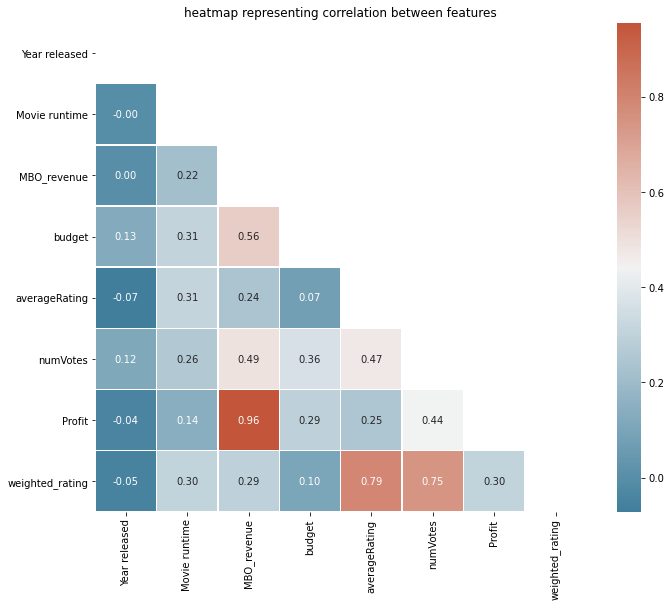

In [49]:
corr = df_with_rating.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# figure size
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# plot the heatmap correlation
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, linewidths=.5, fmt= '.2f',ax=ax).set_title("heatmap representing correlation between features")

plt.show()

***comments:***
* we notice that we have interesting correlation factors between :
 * 0.56 between the MBO revenue and the budget
 * 0.36 between NumVotes and budget
 * 0.30 between weighted_rating and Profit
 * 0.30 between weighted_rating and Movie Runtime
 * 0.49 between numVotes and MBO revenue
 * 0.44 between profit and numVotes
 * 0.96 between profit and MBO_revenue (logical since we defined profit as revenue - budget)

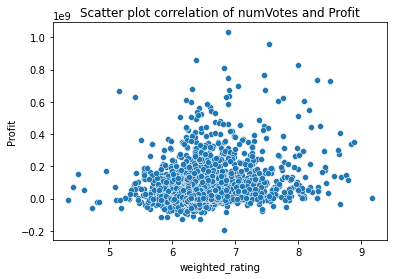

In [50]:
#scatter plot distribution of numVotes and Profit
sns.scatterplot(x="weighted_rating", y="Profit", data=df_with_rating[["Profit", "weighted_rating"]]).set_title("Scatter plot correlation of numVotes and Profit")
plt.show()

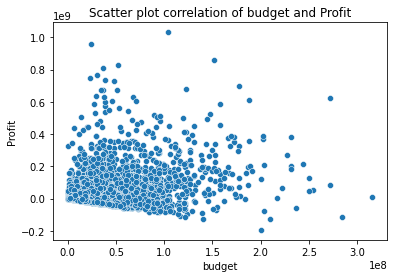

In [51]:
#scatter plot distribution of budget and Profit
sns.scatterplot(x="budget", y="Profit", data=df_with_rating[["Profit", "budget"]]).set_title("Scatter plot correlation of budget and Profit")
plt.show()

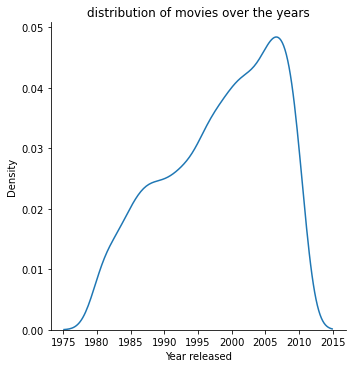

In [52]:
#plotting distributin of Movie count over the years in our dataset
sns.displot(df_with_rating, x="Year released", kind="kde").set(title="distribution of movies over the years")
plt.show()

***comments:***
* we notice that the distribution plot is right-skewed, which means that the density of movies (the bulk of movies) is towards 2010 (i.o.w: we have much more recent movies in our dataset) 

In [53]:
#exploding our genres lists 
exploded = df_with_rating.explode('Movie genres')

We have 265 different genres
Here are the top 15 genres with the most movies in our dataset :
['Drama', 'Comedy', 'Thriller', 'Action', 'Romance Film', 'Action/Adventure', 'Crime Fiction', 'Indie', 'Horror', 'Adventure', 'Romantic comedy', 'Science Fiction']


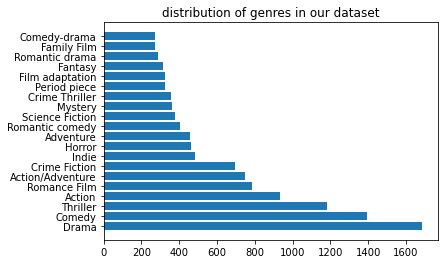

In [54]:
#choosing only the top 12 genres in our dataset 
genre_count = exploded['Movie genres'].value_counts().sort_values(ascending=False)
top_genres = list(genre_count[:12].index)
print("We have " + str(len(genre_count)) +" different genres")
print("Here are the top 15 genres with the most movies in our dataset :")
print(top_genres)
plt.title("distribution of genres in our dataset")
plt.barh(genre_count.index[:20], genre_count[:20])
plt.show()

In [55]:
#only taking the top 12 genres in our exploded dataset 
exploded['Movie genres'] = exploded['Movie genres'].apply(lambda x : x if (x in top_genres) else np.nan )
exploded=exploded.dropna()
exploded.head(5)

,imdbID,Freebase movie ID,Movie name,Movie release date,Year released,Movie runtime,Movie genres,MBO_revenue,budget,averageRating,numVotes,Profit,weighted_rating
0,tt0206314,/m/08pbld,Joy Ride,2001-10-05,2001,97.0,Thriller,4.511683e+07,2.831896e+07,6.6,70424,1.679787e+07,6.397055
0,tt0206314,/m/08pbld,Joy Ride,2001-10-05,2001,97.0,Horror,4.511683e+07,2.831896e+07,6.6,70424,1.679787e+07,6.397055
1,tt0117571,/m/0sy44,Scream,1996-12-18,1996,103.0,Crime Fiction,2.404963e+08,1.945688e+07,7.4,344034,2.210394e+08,7.116556
1,tt0117571,/m/0sy44,Scream,1996-12-18,1996,103.0,Horror,2.404963e+08,1.945688e+07,7.4,344034,2.210394e+08,7.116556
2,tt0246460,/m/014kq6,Die Another Day,2002-11-18,2002,133.0,Thriller,5.236253e+08,1.721176e+08,6.1,220386,3.515077e+08,6.159714


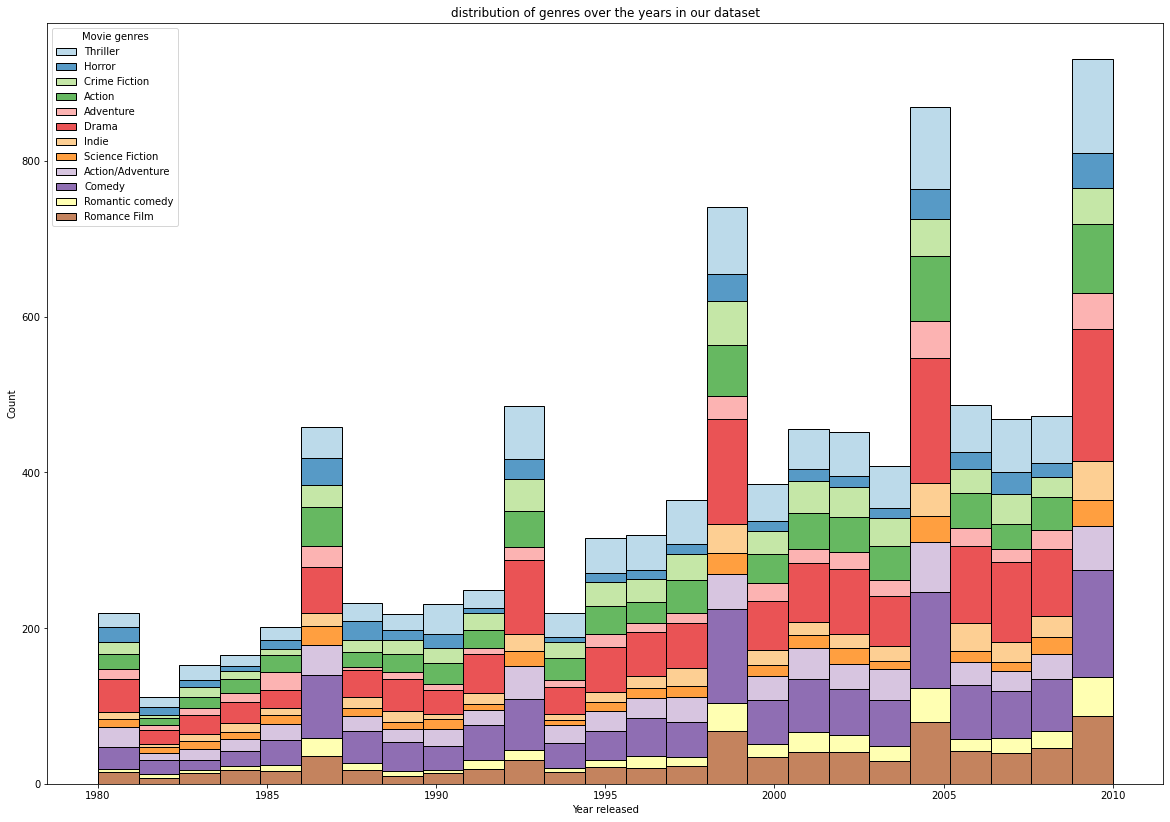

In [56]:
#set up figure size
f, ax = plt.subplots(figsize=(20, 14))
#plotting historgram of movie genres over the years (we chose top 12 genres because of the color palette)
sns.histplot(exploded, ax = ax , x="Year released", hue="Movie genres", multiple="stack",  palette=sns.color_palette("Paired")).set(title="distribution of genres over the years in our dataset")
plt.show()

**comments**

* we notice that drama has approximately the most number of movies in each year followed respectively by comedy, thriller, action 

In [57]:
df_with_rating

,imdbID,Freebase movie ID,Movie name,Movie release date,Year released,Movie runtime,Movie genres,MBO_revenue,budget,averageRating,numVotes,Profit,weighted_rating
0,tt0206314,/m/08pbld,Joy Ride,2001-10-05,2001,97.0,"[Thriller, Crime Thriller, Horror, Psychologic...",4.511683e+07,2.831896e+07,6.6,70424,1.679787e+07,6.397055
1,tt0117571,/m/0sy44,Scream,1996-12-18,1996,103.0,"[Crime Fiction, Mystery, Horror]",2.404963e+08,1.945688e+07,7.4,344034,2.210394e+08,7.116556
2,tt0246460,/m/014kq6,Die Another Day,2002-11-18,2002,133.0,"[Thriller, Glamorized Spy Film, Action, Advent...",5.236253e+08,1.721176e+08,6.1,220386,3.515077e+08,6.159714
3,tt1172991,/m/07kd1dr,The Company Men,2010-01-22,2010,104.0,"[Drama, Indie]",4.882577e+06,1.500000e+07,6.7,46022,-1.011742e+07,6.394890
4,tt1375666,/m/0661ql3,Inception,2010-07-08,2010,148.0,"[Thriller, Science Fiction, Adventure, Psychol...",2.925873e+08,1.600000e+08,8.8,2334604,1.325873e+08,8.680734
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,tt0174204,/m/05m__6g,Simpatico,1999,1999,106.0,"[Crime Fiction, Drama, Indie, World cinema, Co...",1.216724e+06,1.308860e+07,4.7,3626,-1.187187e+07,6.225649
3372,tt0081758,/m/080b_yp,Willie & Phil,1980,1980,115.0,"[Romance Film, Drama, Comedy]",1.164377e+07,1.455471e+07,5.9,492,-2.910942e+06,6.271904
3373,tt0285869,/m/0282l0j,Trois 2: Pandora's Box,2002,2002,104.0,"[Thriller, Erotic thriller, Psychological thri...",1.010620e+06,9.696765e+05,4.7,733,4.094338e+04,6.263567
3374,tt0119578,/m/04ctwyf,Love! Valour! Compassion!,1997-01-25,1997,108.0,"[LGBT, Indie, Drama, Comedy, Gay Themed, Roman...",3.939953e+06,2.717209e+06,7.0,3589,1.222744e+06,6.295360


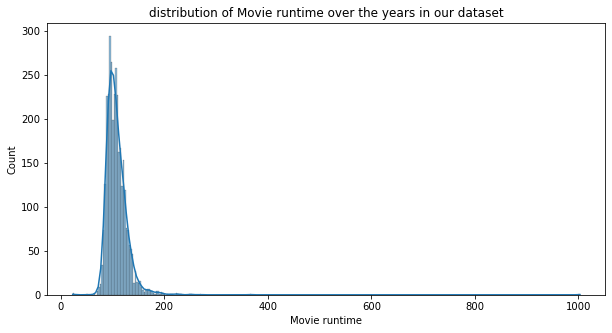

In [58]:
#set up figure size
f, ax = plt.subplots(figsize=(10, 5))
#plotting distribution using histogram plot
sns.histplot(df_with_rating, ax = ax , x="Movie runtime", kde=True).set(title="distribution of Movie runtime over the years in our dataset")
plt.show()

In [59]:
print("The mean duration of our movies in our dataset is : " + str(df_with_rating['Movie runtime'].mean()) + " min")

The mean duration of our movies in our dataset is : 108.00850118483413 min


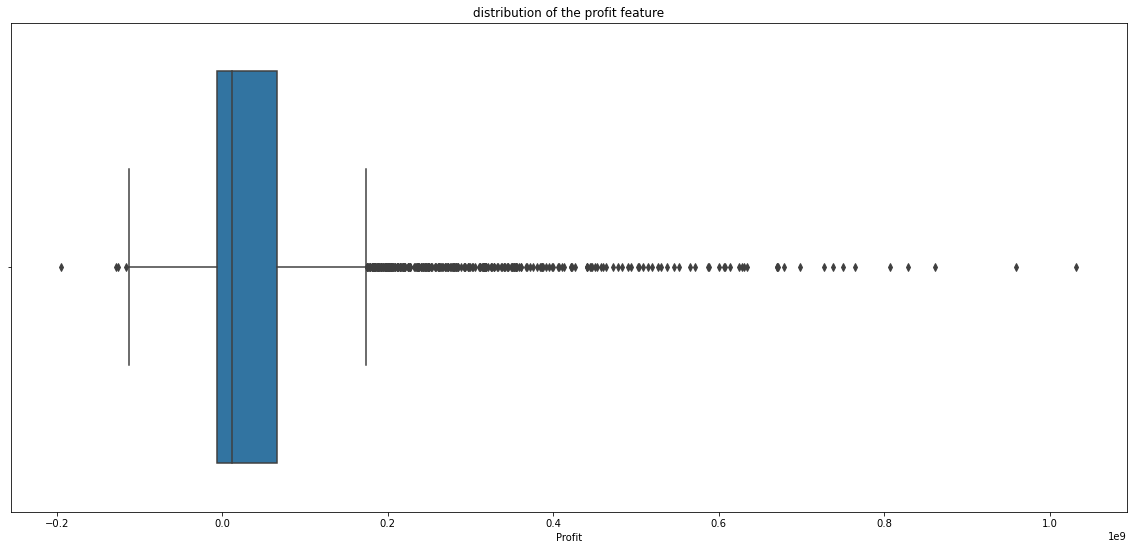

In [60]:
#set up figure size
f, ax = plt.subplots(figsize=(20, 9))
#boxplot distribution of the profit feature
sns.boxplot(data= df_with_rating, ax=ax, x="Profit").set(title="distribution of the profit feature")
plt.show()

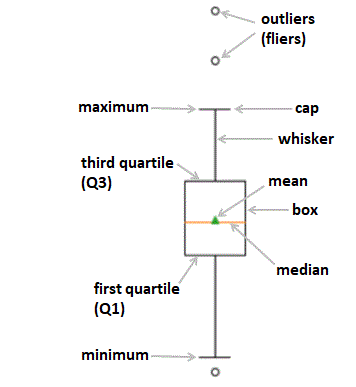

* as stated in this legend picture, we can clearly see in our distribution plot of the profit, the presence of a lot of outliers

In [61]:
#let's have a look at the description of our profit feature
df_with_rating['Profit'].describe()

count    3.376000e+03
mean     4.902506e+07
std      1.061164e+08
min     -1.942991e+08
25%     -5.795391e+06
50%      1.206334e+07
75%      6.613344e+07
max      1.031772e+09
Name: Profit, dtype: float64

***commments:***
* we notice that the max value of Profit generated by a movie is approximetly 2727 million dollars 
* whereas the minimum is -194 million dollars (loss of money)

lets look at the top 3 profittable movies in our dataset 

In [62]:
df_with_rating.iloc[df_with_rating['Profit'].sort_values(ascending=False)[:3].index]

,imdbID,Freebase movie ID,Movie name,Movie release date,Year released,Movie runtime,Movie genres,MBO_revenue,budget,averageRating,numVotes,Profit,weighted_rating
73,tt0116629,/m/0ds2n,Independence Day,1996-06-25,1996,153.0,"[Thriller, Action/Adventure, Science Fiction, ...",1.136005e+09,1.042333e+08,7.0,575719,1.031772e+09,6.878457
875,tt0083866,/m/0jqn5,E.T. the Extra-Terrestrial,1982-05-26,1982,120.0,"[Science Fiction, Adventure, Children's/Family...",9.831965e+08,2.372630e+07,7.9,409505,9.594702e+08,7.541769
513,tt0448157,/m/02vrgnr,Hancock,2008-07-02,2008,102.0,"[Crime Fiction, Science Fiction, Superhero mov...",1.012787e+09,1.519180e+08,6.4,483028,8.608686e+08,6.375558


**Comment:**
* We notice that these are very known blockbusters and thus we can not consider them as outliers and remove them
* We decided to keep all movies and we will proceed by grouping them based on intervals of profits generated in our later steps ???????*

In [63]:
df_means_genres = pd.DataFrame(data=exploded.groupby("Movie genres").mean())
df_means_genres = df_means_genres.drop(columns=["Year released"])
df_means_genres

,Movie runtime,MBO_revenue,budget,averageRating,numVotes,Profit,weighted_rating
Movie genres,,,,,,,
Action,109.596154,1.259153e+08,5.845533e+07,6.148397,159571.282051,6.745998e+07,6.394646
Action/Adventure,109.769437,1.233308e+08,5.887787e+07,6.147721,151495.411528,6.445289e+07,6.386908
Adventure,111.860262,1.420722e+08,6.661856e+07,6.206769,180448.598253,7.545363e+07,6.439959
Comedy,102.448852,8.372244e+07,3.378189e+07,6.111765,84979.713773,4.994055e+07,6.339883
Crime Fiction,110.592806,8.870514e+07,4.017743e+07,6.499568,138603.389928,4.852771e+07,6.503648
Drama,114.539419,8.139905e+07,3.685452e+07,6.629757,121651.694132,4.454453e+07,6.525199
Horror,99.416486,7.487847e+07,2.773005e+07,5.862473,97999.058568,4.714842e+07,6.269042
Indie,103.342975,2.855816e+07,1.228986e+07,6.539876,78730.010331,1.626831e+07,6.463165
Romance Film,109.029936,9.514913e+07,3.508643e+07,6.335159,92372.250955,6.006270e+07,6.392826


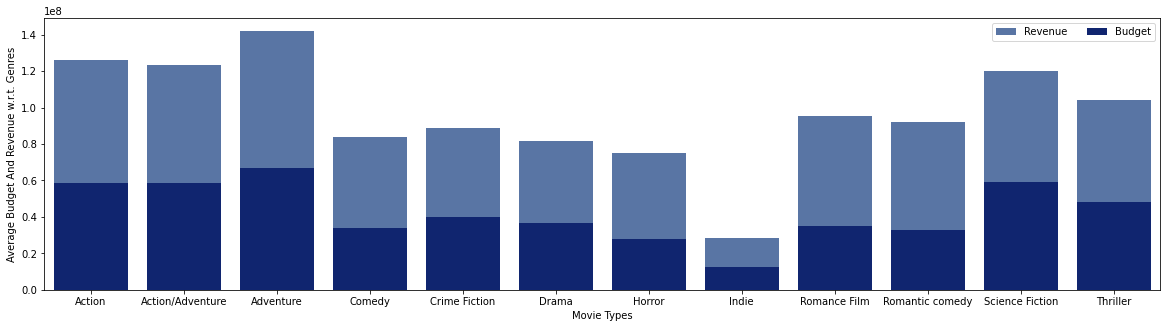

In [64]:
f, ax = plt.subplots(figsize=(20, 5))
sns.set_color_codes("deep")
sns.barplot(x=df_means_genres.index, ax=ax, y="MBO_revenue", data=df_means_genres, label="Revenue", color="b")
sns.set_color_codes("dark")
sns.barplot(x=df_means_genres.index, ax=ax, y="budget", data=df_means_genres, label="Budget", color="b")
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlabel="Movie Types", ylabel="Average Budget And Revenue w.r.t. Genres")
plt.show()

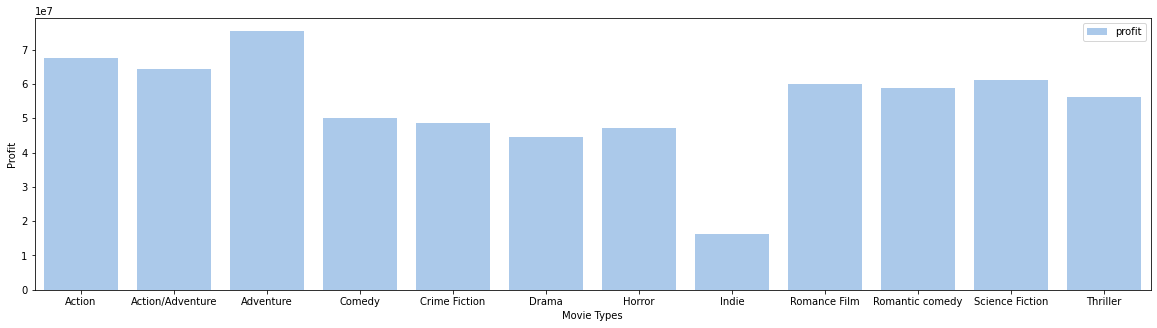

In [65]:
f, ax = plt.subplots(figsize=(20, 5))
sns.set_color_codes("pastel")
sns.barplot(x=df_means_genres.index, ax=ax, y="Profit", data=df_means_genres, label="profit", color="b")
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlabel="Movie Types", ylabel="Profit")
plt.show()

In [67]:
df_with_rating.to_csv('./Data/MrJulia_data/df_with_rating.csv')